In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [19]:
data = {
    'Student_ID': range(1, 11),
    'Marks': [85, 78, np.nan, 92, 88, 69, 95, np.nan, 80, 89],
    'Attendance': [95, 88, 90, np.nan, 85, 80, 92, 78, np.nan, 87],
    'Study_Hours': [5, 4, 6, 7, 5, np.nan, 8, 4, 6, 5],
    'Extracurricular': ['Yes', 'No', 'Yes', np.nan, 'No', 'Yes', 'No', 'Yes', np.nan, 'No']
}

In [20]:
df=pd.DataFrame(data)
df

,Student_ID,Marks,Attendance,Study_Hours,Extracurricular
0,1,85.0,95.0,5.0,Yes
1,2,78.0,88.0,4.0,No
2,3,NaN,90.0,6.0,Yes
3,4,92.0,NaN,7.0,NaN
4,5,88.0,85.0,5.0,No
5,6,69.0,80.0,NaN,Yes
6,7,95.0,92.0,8.0,No
7,8,NaN,78.0,4.0,Yes
8,9,80.0,NaN,6.0,NaN
9,10,89.0,87.0,5.0,No


In [21]:
df.isnull().sum()

Student_ID         0
Marks              2
Attendance         2
Study_Hours        1
Extracurricular    2
dtype: int64

In [22]:
df['Marks']=df['Marks'].fillna(df['Marks'].mean())
df['Attendance']=df['Attendance'].fillna(df['Attendance'].mean())
df['Study_Hours']=df['Study_Hours'].fillna(df['Study_Hours'].mean())
df['Extracurricular']=df['Extracurricular'].fillna(df['Extracurricular'].mode())

In [23]:
df

,Student_ID,Marks,Attendance,Study_Hours,Extracurricular
0,1,85.0,95.000,5.000000,Yes
1,2,78.0,88.000,4.000000,No
2,3,84.5,90.000,6.000000,Yes
3,4,92.0,86.875,7.000000,NaN
4,5,88.0,85.000,5.000000,No
5,6,69.0,80.000,5.555556,Yes
6,7,95.0,92.000,8.000000,No
7,8,84.5,78.000,4.000000,Yes
8,9,80.0,86.875,6.000000,NaN
9,10,89.0,87.000,5.000000,No


<Axes: >

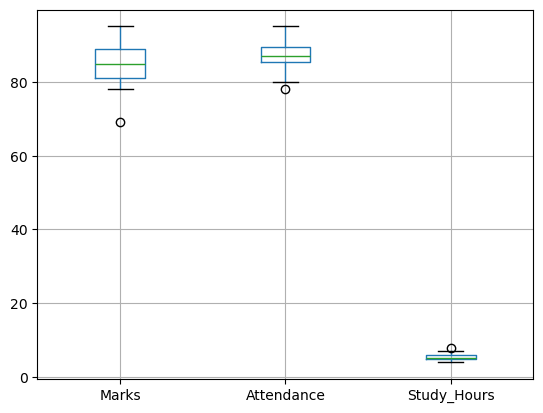

In [24]:
cols=['Marks','Attendance','Study_Hours']
df.boxplot(cols)

In [26]:
Q1=df["Marks"].quantile(0.25)
Q3=df["Marks"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
r_outliers=[]
for i in df["Marks"]:
    if i<lower or i>upper:
        r_outliers.append(i)
        print(r_outliers)

[69.0]


In [31]:
min_max_scaler=preprocessing.MinMaxScaler()
df[['Marks','Attendance','Study_Hours']]=min_max_scaler.fit_transform(df[['Marks','Attendance','Study_Hours']])
df

,Student_ID,Marks,Attendance,Study_Hours,Extracurricular
0,1,0.615385,1.000000,0.250000,Yes
1,2,0.346154,0.588235,0.000000,No
2,3,0.596154,0.705882,0.500000,Yes
3,4,0.884615,0.522059,0.750000,NaN
4,5,0.730769,0.411765,0.250000,No
5,6,0.000000,0.117647,0.388889,Yes
6,7,1.000000,0.823529,1.000000,No
7,8,0.596154,0.000000,0.000000,Yes
8,9,0.423077,0.522059,0.500000,NaN
9,10,0.769231,0.529412,0.250000,No
